# Unsupervised Learning

Unsupervised learning adalah jenis machine learning di mana model diberi tugas untuk mengeksplorasi dan memahami struktur data tanpa memiliki label yang terkait. Salah satu teknik yang sering digunakan dalam unsupervised learning adalah clustering, di mana data dikelompokkan menjadi subset yang memiliki kesamaan tertentu berdasarkan pola atau karakteristik yang ditemukan secara otomatis oleh algoritma, tanpa supervisi eksternal. Clustering bertujuan untuk mengidentifikasi hubungan intrinsik antara data, memungkinkan pemahaman yang lebih dalam tentang pola dan struktur yang tersembunyi dalam data, serta membantu dalam pengelompokkan data yang serupa ke dalam kategori yang berbeda.

Soal 1 : Dataset preparation

*   Download dataset : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
*   Upload di google drive atau github masing-masing
*   Jelaskan tujuan penggunaan dataset ini
*   Jelaskan feature dataset ini








## read dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/CC%20GENERAL.csv', delimiter=',')
df.head()
#df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## dataset description

In [2]:
df.shape

(8950, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
df.corr(numeric_only=True)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


## preprocessing

In [6]:
df_new = df.drop('CUST_ID', axis = 1)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## check missing values

In [7]:
df_new.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## imputation

In [8]:
df_new['MINIMUM_PAYMENTS'].fillna(df_new['MINIMUM_PAYMENTS'].median(), inplace=True)
df_new['CREDIT_LIMIT'].fillna(df_new['CREDIT_LIMIT'].median(), inplace=True)

/tmp/ipykernel_28122/3071234684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['MINIMUM_PAYMENTS'].fillna(df_new['MINIMUM_PAYMENTS'].median(), inplace=True)
/tmp/ipykernel_28122/3071234684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [9]:
df_new.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## scaling

In [10]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

X = df_new.astype(float).values
scaler = StandardScaler().fit(X)
X_new= scaler.transform(X)
X_new

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## KMeans

In [11]:
from sklearn.cluster import KMeans

### elbow method
Mencari nilai k

In [12]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X_new)
    inertia_list.append(kmeans_model.inertia_)
    print("For n_clusters = {}, inertia value is {})".format(num_clusters, kmeans_model.inertia_))

For n_clusters = 1, inertia value is 152149.99999999994)
For n_clusters = 2, inertia value is 127784.71800127946)
For n_clusters = 3, inertia value is 111973.96936865935)
For n_clusters = 4, inertia value is 106115.3651520526)
For n_clusters = 5, inertia value is 91491.6076164908)
For n_clusters = 6, inertia value is 84826.59203083451)
For n_clusters = 7, inertia value is 79856.59156094017)
For n_clusters = 8, inertia value is 77350.36193309278)
For n_clusters = 9, inertia value is 74771.85436388236)
For n_clusters = 10, inertia value is 68351.89161848908)


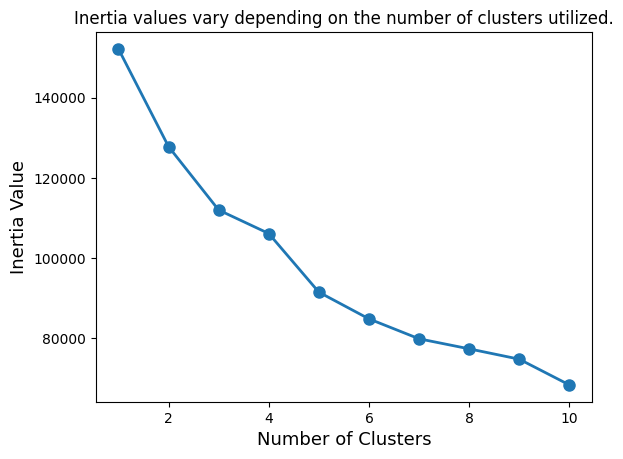

In [13]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Inertia values vary depending on the number of clusters utilized.")
plt.show()

In [14]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

5
5


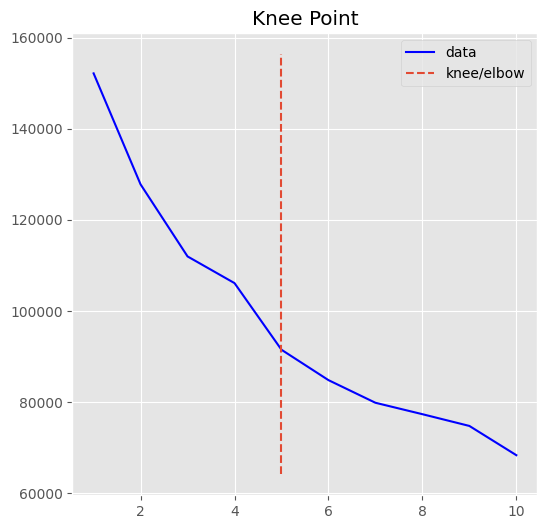

In [15]:
plt.style.use('ggplot')
#kneedle.plot_knee_normalized()
kneedle.plot_knee()

# sampai di stage ini kita mendapatkan k=4 yg optimal
# reference
# https://www.kaggle.com/kevinarvai/knee-elbow-point-detection

### silhouette method
untuk mencari nilai k

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(X_new)

    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.2101015761787539)
For n_clusters = 3, silhouette score is 0.20687881598967853)
For n_clusters = 4, silhouette score is 0.19584613506852727)
For n_clusters = 5, silhouette score is 0.19791084803925482)
For n_clusters = 6, silhouette score is 0.2034742960849018)
For n_clusters = 7, silhouette score is 0.20874618567029285)
For n_clusters = 8, silhouette score is 0.20284109458430066)
For n_clusters = 9, silhouette score is 0.19603727976318025)
For n_clusters = 10, silhouette score is 0.2185573324312162)


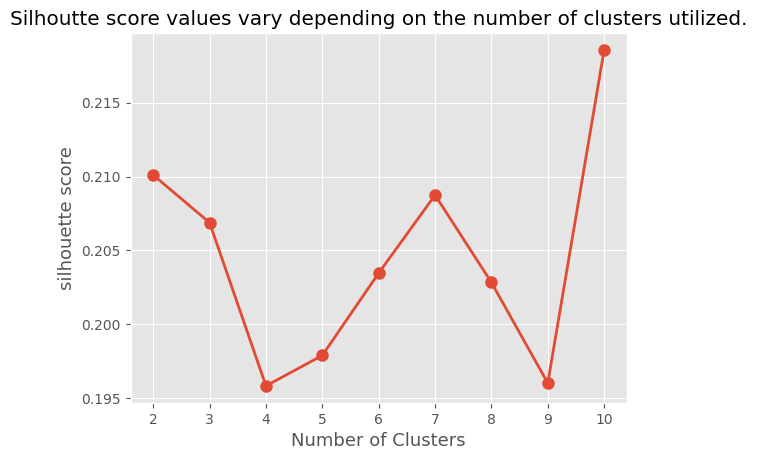

In [17]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Silhoutte score values vary depending on the number of clusters utilized.")
plt.show()
# di stage ini kita menemukan k=3 dengan score tertinggi

### kmeans

In [18]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X_new)
labels = k_means.labels_
df_new['cluster_labels'] = labels
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [19]:
# check centroids nya
centroids = k_means.cluster_centers_
centroids

array([[ 1.42839098,  0.38453693, -0.19954914, -0.13843024, -0.21762157,
         1.68122561, -0.51125394, -0.2215457 , -0.44774753,  1.73689354,
         1.61321457, -0.25569476,  0.81342938,  0.638296  ,  0.53351466,
        -0.40005491, -0.09546769],
       [-0.29888139, -0.3711095 , -0.32800442, -0.23180399, -0.34949161,
        -0.2143363 , -0.61160957, -0.37230544, -0.54401022, -0.15670055,
        -0.19695685, -0.43133863, -0.34978415, -0.2783946 , -0.13093164,
        -0.20722036, -0.090683  ],
       [-0.13230968,  0.38489248,  0.55345406,  0.39010627,  0.59168709,
        -0.35459184,  1.08701313,  0.62624579,  0.96410169, -0.45998881,
        -0.35284749,  0.72515681,  0.18447031,  0.15042466, -0.02149927,
         0.45797534,  0.16894538]])

### Visualization

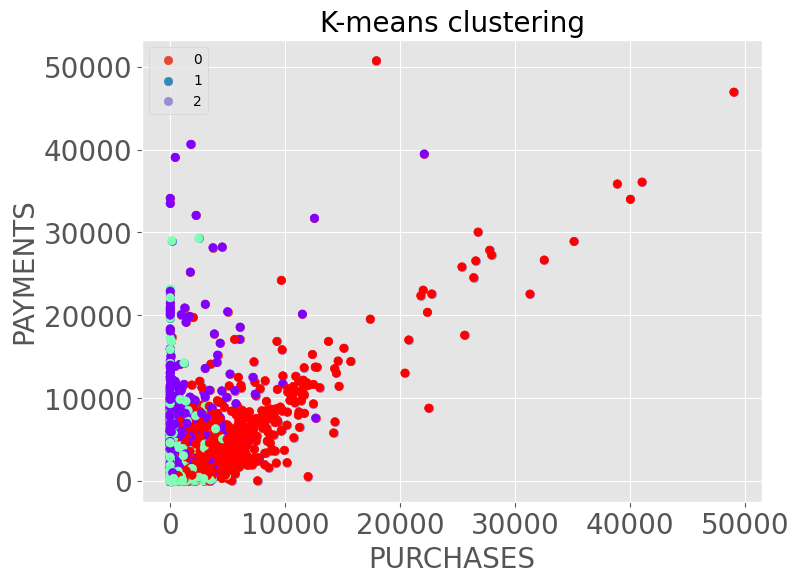

In [20]:
x1 = df_new['PURCHASES']
x2 = df_new['PAYMENTS']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(x1[df_new['cluster_labels'] == i] , x2[df_new['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-means clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

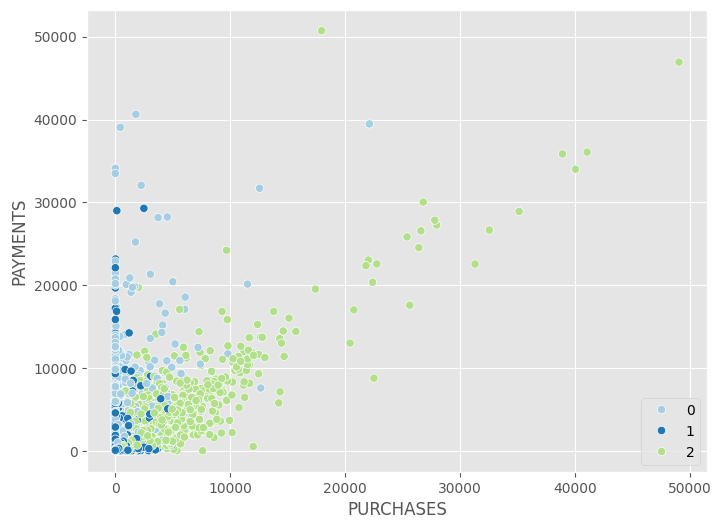

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'PURCHASES'
y_val = 'PAYMENTS'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [22]:
import plotly.express as px

x_val = 'PURCHASES'
y_val = 'PAYMENTS'
z_val = 'BALANCE'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

## KMedoids

### elbow method
untuk mencari nilai k



In [23]:
from sklearn_extra.cluster import KMedoids

inertia_list = []
for num_clusters in range(1, 11):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(X_new)
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")

The inertia of 1 clusters : 32074.48996380632
The inertia of 2 clusters : 28502.252083851865
The inertia of 3 clusters : 26690.45199631644
The inertia of 4 clusters : 25312.680447618714
The inertia of 5 clusters : 24410.14906458207
The inertia of 6 clusters : 25045.959805744402
The inertia of 7 clusters : 23865.264137617396
The inertia of 8 clusters : 23728.760889007306
The inertia of 9 clusters : 21901.105869527415
The inertia of 10 clusters : 23064.59573815541


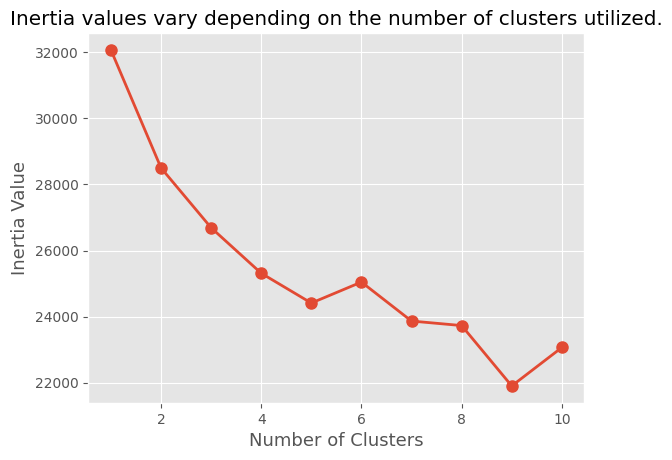

In [24]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Inertia values vary depending on the number of clusters utilized.")
plt.show()

In [25]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

4
4


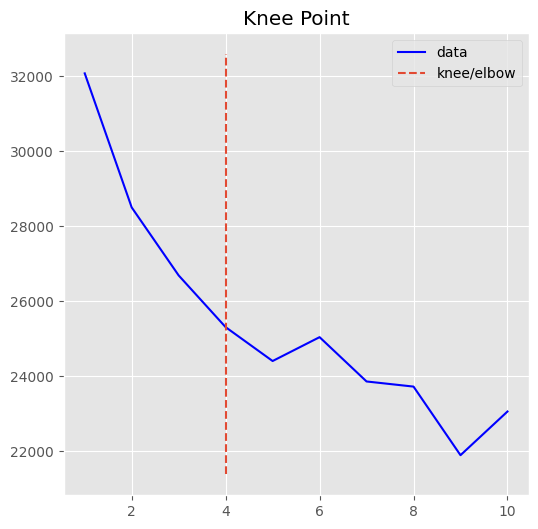

In [26]:
plt.style.use('ggplot')
#kneedle.plot_knee_normalized()
kneedle.plot_knee()

### silhouette method
untuk mencari nilai k

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
sh_list = []
for num_clusters in range(2, 11):
    kmedoids = KMedoids(n_clusters=num_clusters)
    cluster_labels = kmedoids.fit_predict(X_new)

    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.1945165537378692)
For n_clusters = 3, silhouette score is 0.16024040458444103)
For n_clusters = 4, silhouette score is 0.13738603460433335)
For n_clusters = 5, silhouette score is 0.14859330798827058)
For n_clusters = 6, silhouette score is 0.07497117420304265)
For n_clusters = 7, silhouette score is 0.051193591100429474)
For n_clusters = 8, silhouette score is 0.03912406632314492)
For n_clusters = 9, silhouette score is 0.08491760468793152)
For n_clusters = 10, silhouette score is 0.03469231089500277)


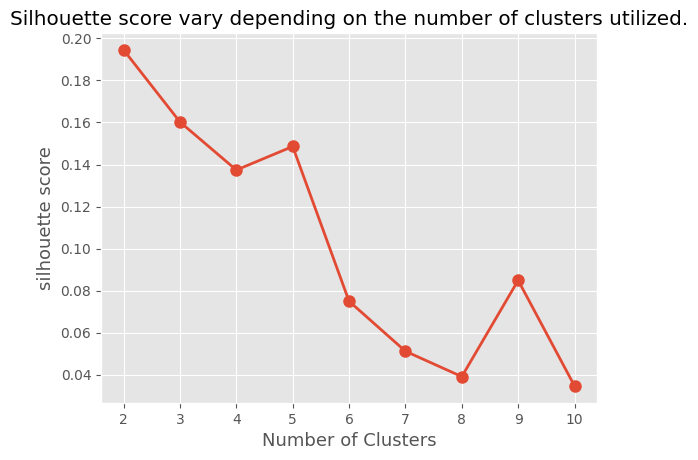

In [28]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Silhouette score vary depending on the number of clusters utilized.")
plt.show()


### kmedoids

In [29]:
k_medoids = KMedoids(n_clusters = 4, random_state = 42)
k_medoids.fit(X_new)
labels = k_medoids.labels_
df_new['cluster_labels'] = labels
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [30]:
centroids = k_medoids.cluster_centers_
centroids

array([[-0.73017008, -1.78447531, -0.15174467,  0.01660604, -0.3893315 ,
        -0.46678555, -0.39122513, -0.39931927, -0.49762862, -0.67534886,
        -0.47606982, -0.39063931, -0.20456068, -0.35069111, -0.32756103,
         0.50015018,  0.36067954],
       [-0.04321221,  0.51808382, -0.41993839, -0.29307072, -0.45457623,
        -0.44947139, -1.01412545, -0.39931927, -0.91699519, -0.25891333,
        -0.18299798, -0.51133325, -0.41069279, -0.47801089, -0.17593333,
        -0.52555097,  0.36067954],
       [-0.65121444,  0.51808382,  0.24224266,  0.03901242,  0.50039651,
        -0.46678555,  1.06221062,  0.15936716,  1.38951716, -0.67534886,
        -0.47606982,  0.37375564, -0.27327139,  0.0131038 , -0.2796588 ,
         0.04428414,  0.36067954],
       [ 1.16410803,  0.51808382, -0.40096824, -0.32982224, -0.3423    ,
         0.80421891, -0.18359002, -0.39931927, -0.2879466 ,  1.8232743 ,
         0.69621752, -0.350408  ,  0.41383563, -0.14385479,  0.17482124,
        -0.52555097

### Visualization

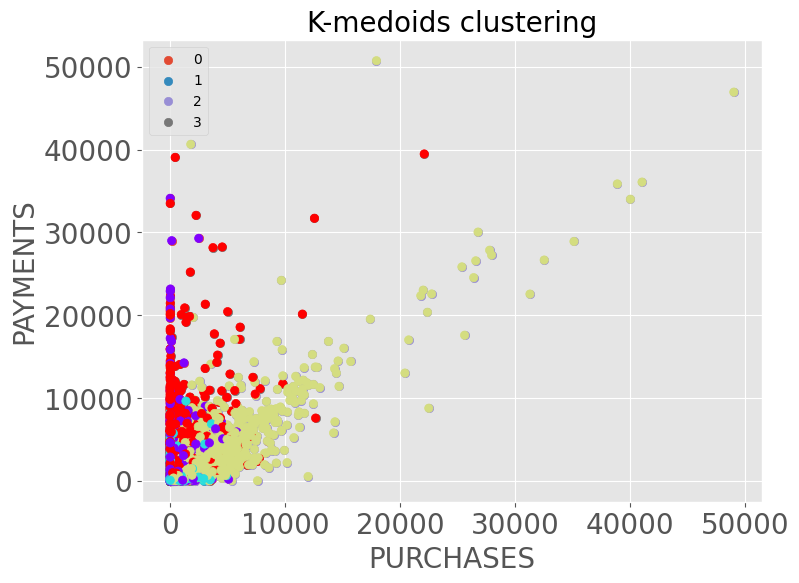

In [31]:
x1 = df_new['PURCHASES']
x2 = df_new['PAYMENTS']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(x1[df_new['cluster_labels'] == i] , x2[df_new['cluster_labels'] == i] , label = i)

plt.scatter(x1,x2, c=k_medoids.labels_, cmap='rainbow')
plt.xlabel(x1.name,  fontsize=20)
plt.ylabel(x2.name,  fontsize=20)
plt.title('K-medoids clustering',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

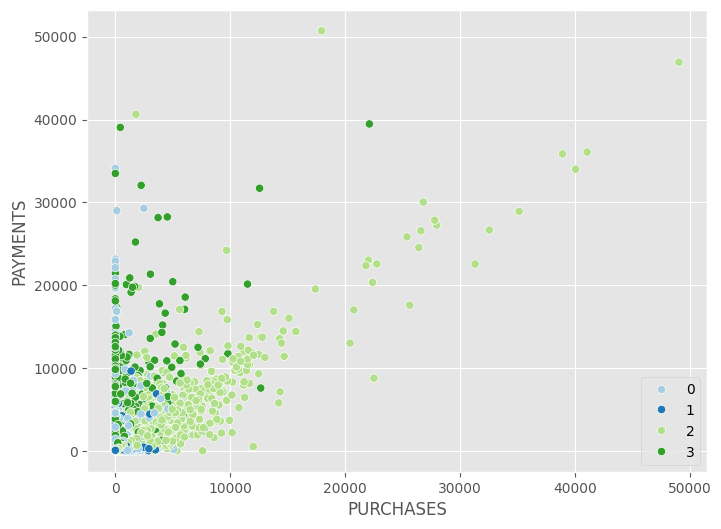

In [32]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'PURCHASES'
y_val = 'PAYMENTS'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [33]:
import plotly.express as px

x_val = 'PURCHASES'
y_val = 'PAYMENTS'
z_val = 'BALANCE'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

## Discussion

In [34]:
df_out = df_new.groupby(by = 'cluster_labels').sum()[['PURCHASES','PAYMENTS','BALANCE']].reset_index()
df_out

,cluster_labels,PURCHASES,PAYMENTS,BALANCE
0,0,624164.63,1.750357e+06,1.861875e+05
1,1,729117.47,2.268248e+06,3.507307e+06
2,2,6615989.42,6.562254e+06,3.576875e+06
3,3,1009411.74,4.930778e+06,6.731680e+06


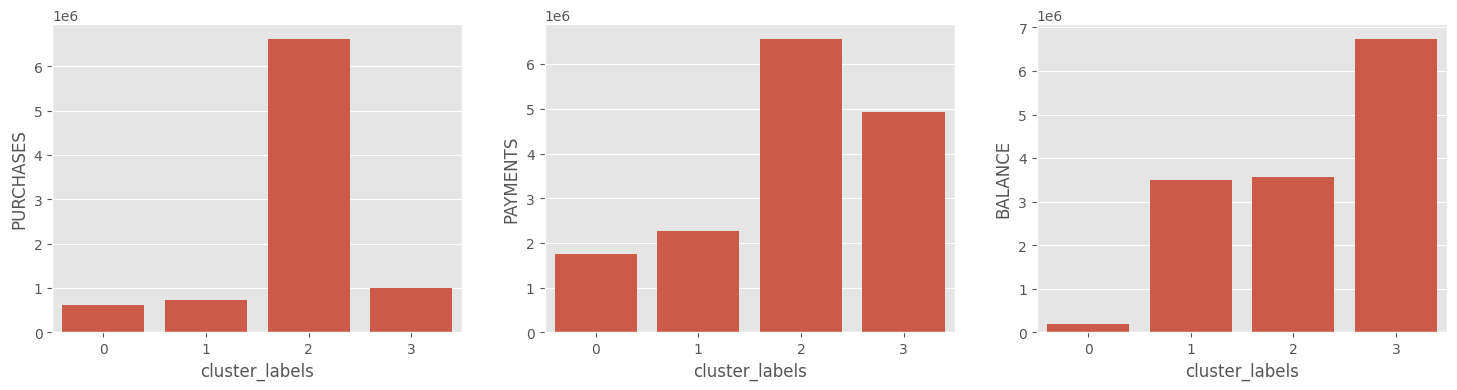

In [35]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'cluster_labels',y = 'PURCHASES', data = df_out)
plt.subplot(1,3,2)
sns.barplot(x= 'cluster_labels',y = 'PAYMENTS', data = df_out)
plt.subplot(1,3,3)
sns.barplot(x= 'cluster_labels',y = 'BALANCE', data = df_out)
plt.show()

Cluster 0 : Mempunyai jumlah terendah dalam PURCHASES, PAYMENTS dan BALANCE

Cluster 1 : Mempunyai jumlah sedang dalam PURCHASES, PAYMENTS dan BALANCE

Cluster 2 : Mempunyai jumlah tertinggi dalam PURCHASES, PAYMENTS tetapi jumlah sedang dalam BALANCE

Cluster 3 : Mempunyai jumlah sedang dalam PURCHASES, PAYMENTS tetapi jumlah tertinggi dalam BALANCE


In [36]:
#untuk encoding
from sklearn.preprocessing import LabelEncoder

cats = df.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df[i] = le.fit_transform(df[i])

Soal 2: Menggunakan dataset lain, silahkan mengerjakan clustering menggunakan K-Means dan K-medoids